## Nama: Farel Arden

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# downloading a tokenization script created by the Google team
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk, re, string



from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
import pandas_profiling as pp
pp.ProfileReport(train_df)

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
train_df.shape

(7613, 5)

In [6]:
train_df.location.unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [7]:
train_df.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [8]:
dup_train = train_df['text'].duplicated().sum()
print(f'there are {dup_train} tweets duplicated in train_df.')

there are 110 tweets duplicated in train_df.


In [9]:
train_df = train_df.drop_duplicates(subset=['text'], keep='first')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    4305
1    3198
Name: target, dtype: int64

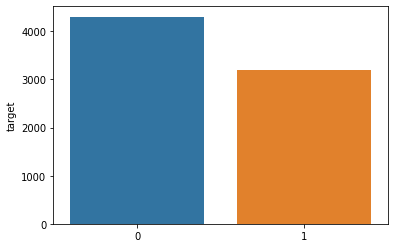

In [10]:
# check the distribution of the disaster and no-disaster tweets
count = train_df['target'].value_counts()
sns.barplot(count.index, count)
count

In [11]:
def Data_Cleaning(text):
    text = text.lower()
    text = re.sub("won\'t", "will not", text)
    text = re.sub("can\'t", "can not", text)
    text = re.sub("don\'t", "do not", text)
    
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+',' ', text)
    text = re.sub(r'&amp?;',' ', text)
    text = re.sub(r'&lt;',' ', text)
    text = re.sub(r'&gt;',' ', text)
    
    text = re.sub(r'\d{2}:\d{2}:\d{2}', ' ', text)
    text = re.sub(r'UTC', ' ', text)
    text = re.sub(r'\d{2}km', ' ', text)
    text = re.sub(r"\b\d+\b", " ", text) # removing the numbers

    text = re.sub(r"#","",text) 
    text = re.sub(r"(?:\@)\w+", ' ', text)
    text = re.sub(r'\n', ' ', text)
    
    text = text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
    text = re.sub(' +', ' ', text) # remove multiple spaces
    
    text = [word for word in word_tokenize(text) if not word in stopwords.words('english')]
    text = ' '.join(text)

    return text

In [12]:
train_df['text'] = train_df['text'].apply(lambda x: Data_Cleaning(x))
test_df['text'] = test_df['text'].apply(lambda x: Data_Cleaning(x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
text = train_df['text'].values
target = train_df['target'].values

In [14]:
from sklearn.model_selection import train_test_split
text_train, text_valid, target_train, target_valid = train_test_split(text, target, test_size=0.2)

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_train) 
tokenizer.fit_on_texts(text_valid)
 
sekuens_latih = tokenizer.texts_to_sequences(text_train)
sekuens_test = tokenizer.texts_to_sequences(text_valid)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

2021-09-12 13:14:15.835525: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-12 13:14:15.835664: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [16]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [17]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2021-09-12 13:14:22.612106: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-12 13:14:22.618298: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-12 13:14:22.618350: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-12 13:14:22.618385: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (07a668aeccf3): /proc/driver/nvidia/version does not exist
2021-09-12 13:14:22.619539: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

In [18]:
target_train.shape

(6002,)

In [19]:
target_train = np.asarray(target_train).astype('float32').reshape((-1,1))
target_valid = np.asarray(target_valid).astype('float32').reshape((-1,1))


In [20]:
padded_latih.shape

(6002, 22)

In [21]:
padded_test.shape

(1501, 23)

In [22]:
target_train.shape

(6002, 1)

In [23]:
target_valid.shape

(1501, 1)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          80000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                20736     
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 118,897
Trainable params: 118,897
Non-trainable params: 0
__________________________________________________

In [25]:
num_epochs = 30
history = model.fit(padded_latih, target_train, epochs=num_epochs, 
                    validation_data=(padded_test, target_valid), verbose=2, callbacks=[callbacks])

2021-09-12 13:14:24.059907: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-12 13:14:24.070863: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/30
188/188 - 5s - loss: 0.5523 - accuracy: 0.7124 - val_loss: 0.4712 - val_accuracy: 0.7828
Epoch 2/30
188/188 - 2s - loss: 0.3496 - accuracy: 0.8564 - val_loss: 0.4725 - val_accuracy: 0.7868
Epoch 3/30
188/188 - 2s - loss: 0.2627 - accuracy: 0.8999 - val_loss: 0.5607 - val_accuracy: 0.7675
Epoch 4/30
188/188 - 2s - loss: 0.1953 - accuracy: 0.9304 - val_loss: 0.6031 - val_accuracy: 0.7588

Akurasi telah mencapai >90%!


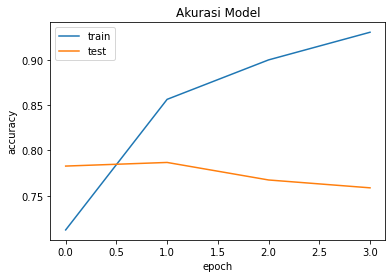

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

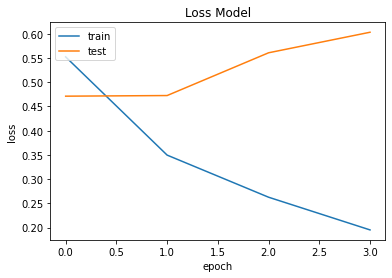

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()